In [2]:
import Motoresdecombustioninterna as th

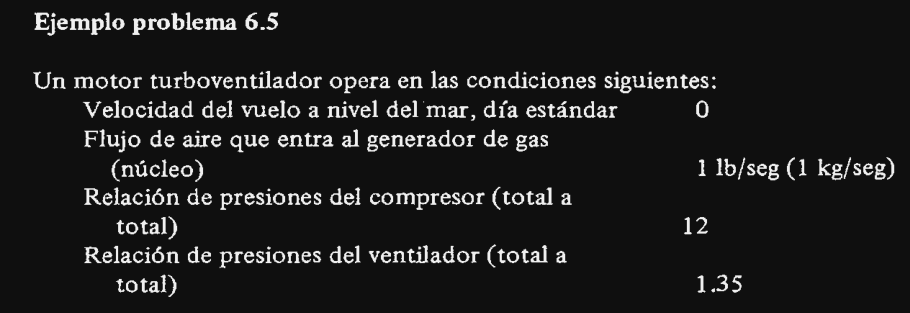

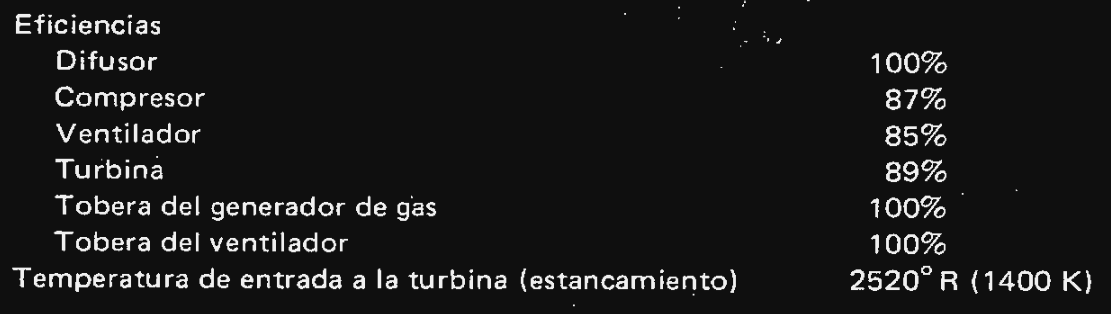

In [3]:
V1 = 0 #Velocidad de vuelo
MA = 1 #lb/s
RC = 12 # Relación de compresor
RV = 1.35 #Relación del ventilador
# ---------------- Eficiencias ----------------
ND = 1 # Eficiencia de difusor
NC = 0.87 # Eficiencia de compresor
NVEN = 0.85 # Eficiencia del ventilador
NTUR = 0.89 # Eficiencia de turbina
NTOB = 1 # Eficiencia tobera del generador de gas
NTOBV = 1 # Eficiencia tobera del ventilador
T3 = 2520 # °R Temperatura de entrada a la turbina (estancamiento)
h = 0 # Altura a nivel del mar en ft
U = 1 # SISTEMA INGLES
R = 1.98718 # BTU/MOL*R
GC = 32.2 #lbm*ft/lbf*s^2
FactorCONV = 778.16 #BTU a lbf*ft

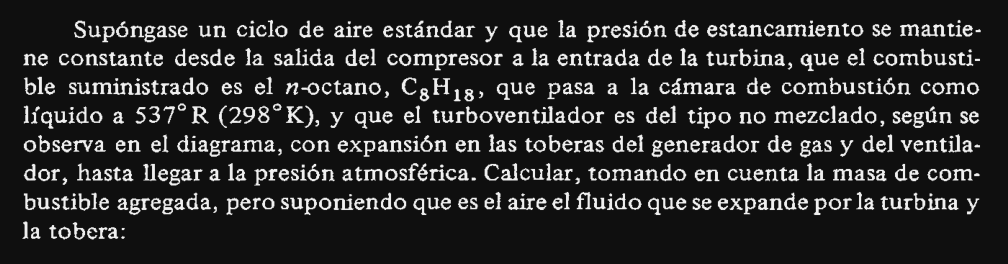

Aire estandar

pt2 = pt3

Turboventilador no mezclado

Tobera convergente-divergente

El aire se expande por la turbina y tobera

In [4]:
x = 8 # OCTANO
TF = 537 # Rankine, temperatura de combustible en la cámara de combustión
pesoMolecCombustible = th.pesoCombustible(x)

In [5]:
th.reaccionGeneral(x)

La reacción general es
C8H18 + 12.5 O2 --> 8 CO2 + 9.0 H2O
La reacción con aire seco es
C8H18 + 59.6659 AS --> 8 CO2 + 9.0 H2O + 59.6659 AS-12.5 O2


Los moles para la reacción con aire seco

C8H18	1
 O2	-12.5
 CO2	8
 H2O	9.0
Aire	59.6659


In [6]:
# VALORES A MODIFICAR
molC8H18 = 1
molO2    = -12.5
molCO2   = 8
molH2O   = 9
molAireTeorico = 59.6659 #aire teorico, no real

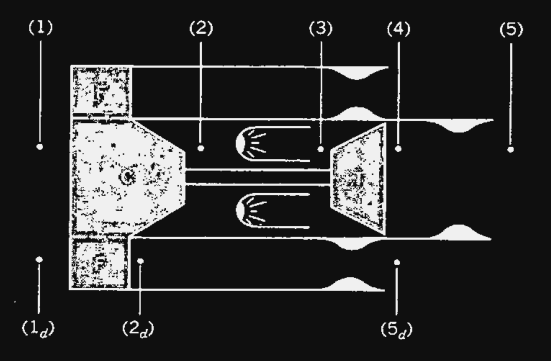

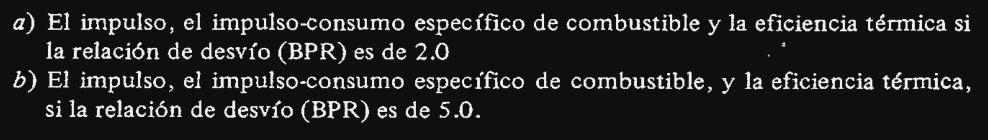

In [7]:
BPRA = 2
BPRB = 5

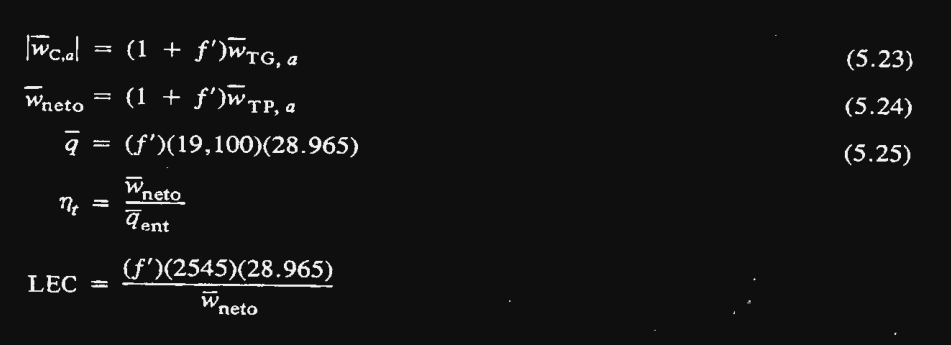

# Valores del punto 1 (Ent. Compresor)

In [8]:
tt1, pt1 = th.ISApropiedades(U,a=h)

In [9]:
tt1

In [10]:
pt1

In [11]:
ht1,pr1,st1 = th.valoresTablaAire(U,t=tt1)

-175.9568 h(Btu/mol) | 1.20686 Pr | 46.130045 s(Btu/mol*R)


# Sacar valores punto 2 ideal (Ent. Cámara de combustión)

Aquí entra el combustible y el exceso de aire seco

In [12]:
pt2=RC*pt1
pt2 #psi

In [13]:
pr2i = th.presionRelativa(pr1=pr1,rp=RC)
pr2i

In [14]:
ht2i,tt2i,st2i = th.valoresTablaAire(U,pr=pr2i)

3542.72890625 h(Btu/mol) | 1044.928125 Temperatura(R) | 51.06700406 s(Btu/mol*R)


# Sacar valores reales 2 (Ent. Cámara de combustión)

In [15]:
ht2r = th.eficienciaCompresor(eficCompresor=NC,h1=ht1,h2i=ht2i)
ht2r

In [16]:
tt2r,pr2r,st2r = th.valoresTablaAire(U,h=ht2r)

1121.26975225 Temperatura(R) | 18.74580393 Pr | 51.58025339 s(Btu/mol*R)


# Valores de cámara de combustión

In [17]:
print("Temperatura 2a del aire:",tt2r, "\nTemperatura 3 de los productos:", T3)

Temperatura 2a del aire: 1121.26975225 
Temperatura 3 de los productos: 2520


In [18]:
molAireReal = (molCO2*th.moleculaEntalpia("co2",T3,U)
              +molH2O*th.moleculaEntalpia("h2o",T3,U)
              +molO2*th.moleculaEntalpia("o2",T3,U)
              -molC8H18*th.moleculaEntalpia("c8h18",T3,U)
              )/(th.moleculaEntalpia("aire seco",tt2r,U)-th.moleculaEntalpia("aire seco",T3,U))

molAireReal # lmolAire/lbmolCombustible

In [19]:
porcExcesoAire = th.excesoAire(suministradaReal=molAireReal, suministradaTeorica=molAireTeorico)
porcExcesoAire # Porcentaje

In [20]:
relCA = th.relCombustibleAireGases(C=x, CM = 1, AM = molAireReal)
relCA #[lbcombustible/lbaire]

# Valores del punto 3 (Ent. Turbina de gas)

In [21]:
ht3,pr3,st3 = th.valoresTablaAire(U,t=T3)

15108.5 h(Btu/mol) | 450.9 Pr | 57.901 s(Btu/mol*R)


In [22]:
pt3=pt2
pt3

In [23]:
wCompresorR = ht2r-ht1
wCompresorR #BTU/lbmolAire, valores del aire

In [24]:
qent = ht3-ht2r
qent

# Para el ventilador (2d)

In [25]:
pr2di = RV*pr1
pr2di

In [28]:
h2di,t2di,s2di = th.valoresTablaAire(U,pr=pr2di)

146.79044202 h(Btu/mol) | 565.07046581 Temperatura(R) | 46.72536673 s(Btu/mol*R)


In [29]:
wVentiladori = (h2di-ht1)
wVentiladori

In [30]:
wVentiladorr=wVentiladori/NVEN
wVentiladorr

In [31]:
h2dr = th.eficienciaCompresor(eficCompresor=NVEN,h1=ht1,h2i=h2di)
h2dr

In [32]:
t2dr,pr2dr,s2dr = th.valoresTablaAire(U,h=h2dr)

573.24904414 Temperatura(R) | 1.71327742 Pr | 46.82531343 s(Btu/mol*R)


# Para la tobera del ventilador (5d)

In [33]:
pr5dr = pr2dr/RV
pr5dr

In [34]:
h5dr,t5dr,s5dr = th.valoresTablaAire(U,pr=pr5dr)

-123.96090858 h(Btu/mol) | 526.14950956 Temperatura(R) | 46.22917353 s(Btu/mol*R)


### Velocidad del ventilador

In [35]:
v5d = ((h2dr-h5dr)*2*GC*FactorCONV/(th.aireSecoMol))**(1/2)
v5d

# BPR = 2

In [36]:
wTurbinaRBPRa = (wCompresorR+BPRA*wVentiladorr)/(1+relCA)
wTurbinaRBPRa

# 

## Valores del punto 4 (Ent. de tobera)

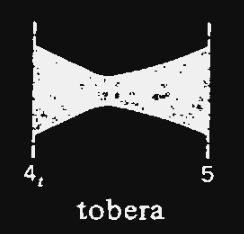

In [37]:
ht4ra = ht3-wTurbinaRBPRa
ht4ra

In [38]:
tt4ra,pr4ra,st4ra = th.valoresTablaAire(U,h=ht4ra)

1914.87258744 Temperatura(R) | 146.48126658 Pr | 55.66572124 s(Btu/mol*R)


In [39]:
ht4ia = th.eficienciaTurbinaGas(eficTurbinaGas=NTUR,h3=ht3,h4r=ht4ra)
ht4ia

In [40]:
tt4ia,pr4ia,st4ia = th.valoresTablaAire(U,h=ht4ia)

1838.27571452 Temperatura(R) | 124.41134006 Pr | 55.34158557 s(Btu/mol*R)


In [41]:
pt4a = pt3*(pr4ia/pr3)
pt4a #psi

## Valores del punto 5 (Sal. de tobera)

In [42]:
p5=pt1
p5

In [45]:
pr5ia = pr4ra*(p5/pt4a)
pr5ia #PSI

In [46]:
ht5ia,tt5ia,st5ia = th.valoresTablaAire(U,pr=pr5ia)

6249.78230707 h(Btu/mol) | 1410.23513286 Temperatura(R) | 53.28626972 s(Btu/mol*R)


In [47]:
v5ia = ((ht4ra-ht5ia)*2*GC*(778.16)/th.aireSecoMol)**(1/2)
v5ia #ft / s

In [48]:
impulsoConvDiv = ((1+relCA)*v5ia+BPRA*v5d)/GC
impulsoConvDiv #lbf

In [51]:
porcImpulsoGenGasa = (1+relCA)*v5ia/GC/impulsoConvDiv*100
porcImpulsoGenGasa

In [52]:
TSFCa = 3600*relCA/impulsoConvDiv
TSFCa

In [53]:
nt = (v5ia**2+BPRA*v5d**2)/(2*GC*FactorCONV*qent/th.aireSecoMol)
nt

# BPR = 5

In [54]:
wTurbinaRBPRb = (wCompresorR+BPRB*wVentiladorr)/(1+relCA)
wTurbinaRBPRb

## Valores del punto 4 (Ent. de tobera)

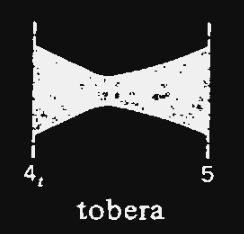

In [55]:
ht4rb = ht3-wTurbinaRBPRb
ht4rb

In [56]:
tt4rb,pr4rb,st4rb = th.valoresTablaAire(U,h=ht4rb)

1774.22170852 Temperatura(R) | 108.05609919 Pr | 55.0612866 s(Btu/mol*R)


In [57]:
ht4ib = th.eficienciaTurbinaGas(eficTurbinaGas=NTUR,h3=ht3,h4r=ht4rb)
ht4ib

In [58]:
tt4ib,pr4ib,st4ib = th.valoresTablaAire(U,h=ht4ib)

1679.02248101 Temperatura(R) | 86.9044962 Pr | 54.62845454 s(Btu/mol*R)


In [59]:
pt4b = pt3*(pr4ib/pr3)
pt4b #psi

## Valores del punto 5 (Sal. de tobera)

In [60]:
p5=pt1
p5

In [61]:
pr5ib = pr4rb*(p5/pt4b)
pr5ib #PSI

In [62]:
ht5ib,tt5ib,st5ib = th.valoresTablaAire(U,pr=pr5ib)

6403.72983168 h(Btu/mol) | 1430.5240068 Temperatura(R) | 53.39477724 s(Btu/mol*R)


In [63]:
v5ib = ((ht4rb-ht5ib)*2*GC*(778.16)/th.aireSecoMol)**(1/2)
v5ib #ft / s

In [64]:
impulsoConvDivb = ((1+relCA)*v5ib+BPRB*v5d)/GC
impulsoConvDivb #lbf

In [65]:
porcImpulsoGenGasa = (1+relCA)*v5ib/GC/impulsoConvDivb*100
porcImpulsoGenGasa

In [66]:
TSFCb = 3600*relCA/impulsoConvDivb
TSFCb

In [67]:
nt = (v5ib**2+BPRB*v5d**2)/(2*GC*FactorCONV*qent/th.aireSecoMol)
nt